In [377]:
import numpy as np
import pandas as pd
from astroplan import Observer
from astropy import coordinates
from astropy.coordinates import EarthLocation
from astropy.time import Time
from astroplan.plots import plot_airmass
from astropy.coordinates import get_sun, get_body, get_moon
from astroplan import moon_illumination
from astroplan import MoonSeparationConstraint, observability_table
import astropy.units as u
from astroplan import AltitudeConstraint, AirmassConstraint, AtNightConstraint
from astroplan import Constraint
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget

In [378]:
quasars=pd.read_fwf('quasars.txt', skiprows=4, delimiter='|')
quasars[0:10]

,name,ra,dec
0,WISEA J043431.62-894617.9,04 34 31.62,-89 46 17.9
1,WISEA J094017.96-894442.8,09 40 17.96,-89 44 42.8
2,WISEA J192247.55-893602.5,19 22 47.55,-89 36 02.5
3,WISEA J174333.00-893514.8,17 43 33.01,-89 35 14.8
4,WISEA J214955.49-893435.5,21 49 55.50,-89 34 35.6
5,WISEA J094526.46-893159.0,09 45 26.47,-89 31 59.0
6,WISEA J212638.23-892859.5,21 26 38.24,-89 28 59.5
7,WISEA J045305.39-892601.5,04 53 05.40,-89 26 01.6
8,WISEA J174350.23-892550.8,17 43 50.23,-89 25 50.9
9,WISEA J005023.03-892532.2,00 50 23.03,-89 25 32.3


In [379]:
dupont=Observer.at_site("lco")
dupont

<Observer: name='lco',
    location (lon, lat, el)=(-70.70166666666665 deg, -29.003333333333327 deg, 2281.9999999994607 m),
    timezone=<UTC>>

In [380]:
time=np.arange('2019-05-15', '2019-05-31', dtype='datetime64[D]')
start_time=(['2019-05-15'])
end_time=(['2019-05-30'])

moon_ratio=dupont.moon_illumination(time)
moon_ratio

moon_phase = dupont.moon_phase(time)
print(moon_phase)


[0.88831637 0.6586472  0.43176186 0.21192157 0.07238651 0.24816147
 0.45501737 0.65920405 0.85897168 1.05458923 1.24694396 1.43723874
 1.6268483  1.81721446 2.00975029 2.20574009] rad


In [414]:
table_values=quasars.as_matrix()

targets=[FixedTarget(coord=SkyCoord(RA, DEC, unit=[u.hour,u.deg]), name=Name)
           for Name, RA, DEC in table_values]

targets[0:10]

/Users/josephbreneman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(<FixedTarget "WISEA J192122.06-885151.0" at SkyCoord (ICRS): (ra, dec) in deg (290.34191667, -88.86416667)>,
 <FixedTarget "WISEA J165652.42-885007.6" at SkyCoord (ICRS): (ra, dec) in deg (254.21845833, -88.83547222)>)

In [390]:
from astropy.table import Table
from astroplan import is_observable, is_always_observable, months_observable
from astroplan.utils import time_grid_from_range

In [391]:

constraints = [AirmassConstraint(2), AtNightConstraint.twilight_astronomical(), MoonSeparationConstraint(35*u.deg)]

beginning=Time(['2019-05-15'])
end=Time(['2019-05-30'])

window_range=[beginning, end]
window_time_grid=time_grid_from_range(window_range)
observation_range=Time(['2019-05-15','2019-05-30'])

observing_table=observability_table(constraints, dupont, targets, time_range=observation_range)
pd.set_option('display.max_rows', 100)
observing_table1=observing_table.to_pandas()


In [421]:
mask=observing_table1['fraction of time observable'] >= 0.13

observable=observing_table1[mask]['target name']
print(observable)

target_10=(targets[69], targets[74], targets[75], targets[82], targets[85], targets[86], targets[87], 
        targets[88], targets[89], targets[98])
target_10

69    WISEA J192122.06-885151.0
74    WISEA J165652.42-885007.6
75    WISEA J155425.24-884855.3
82    WISEA J130854.96-884531.2
85    WISEA J130833.61-884235.0
86    J172444.09-884210.1      
87    WISEA J204249.84-884107.5
88    WISEA J204914.51-884038.8
89    WISEA J201039.17-884031.6
98    WISEA J202443.67-883734.7
Name: target name, dtype: object


(<FixedTarget "WISEA J192122.06-885151.0" at SkyCoord (ICRS): (ra, dec) in deg (290.34191667, -88.86416667)>,
 <FixedTarget "WISEA J165652.42-885007.6" at SkyCoord (ICRS): (ra, dec) in deg (254.21845833, -88.83547222)>,
 <FixedTarget "WISEA J155425.24-884855.3" at SkyCoord (ICRS): (ra, dec) in deg (238.60516667, -88.81536111)>,
 <FixedTarget "WISEA J130854.96-884531.2" at SkyCoord (ICRS): (ra, dec) in deg (197.229, -88.75869444)>,
 <FixedTarget "WISEA J130833.61-884235.0" at SkyCoord (ICRS): (ra, dec) in deg (197.14008333, -88.70975)>,
 <FixedTarget "J172444.09-884210.1      " at SkyCoord (ICRS): (ra, dec) in deg (261.18370833, -88.70280556)>,
 <FixedTarget "WISEA J204249.84-884107.5" at SkyCoord (ICRS): (ra, dec) in deg (310.70770833, -88.68544444)>,
 <FixedTarget "WISEA J204914.51-884038.8" at SkyCoord (ICRS): (ra, dec) in deg (312.31045833, -88.67744444)>,
 <FixedTarget "WISEA J201039.17-884031.6" at SkyCoord (ICRS): (ra, dec) in deg (302.66325, -88.67547222)>,
 <FixedTarget "WISEA 

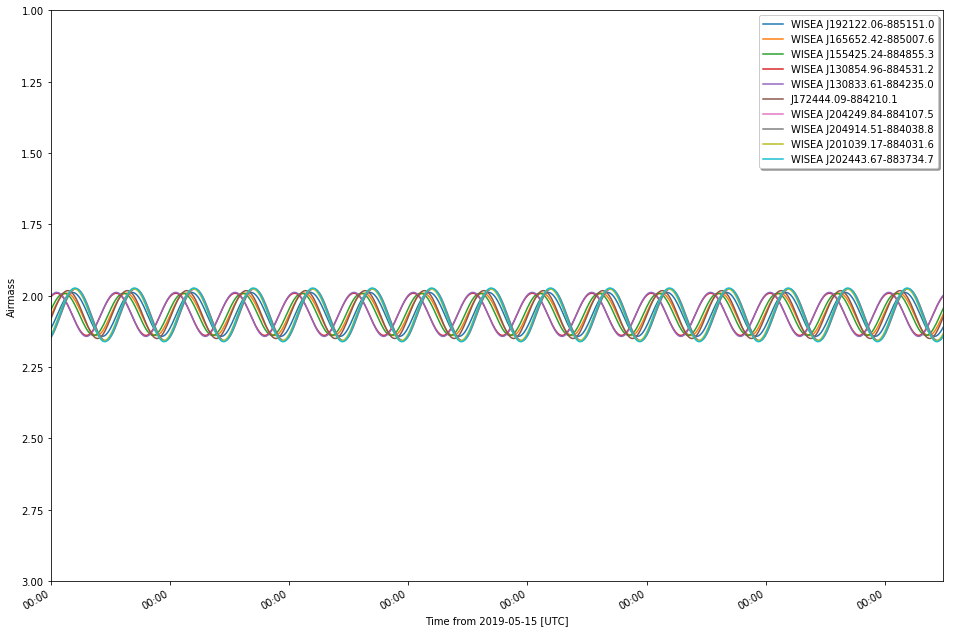

In [425]:
import matplotlib.pyplot as plt
from astroplan.plots import plot_airmass

fig,ax = plt.subplots(1,1)
fig.set_size_inches(16,10.5) 

observation_time = Time('2019-05-15', '2019-05-30')
plot_airmass(target_10, dupont, window_time_grid)
ax.legend(loc=0,shadow=True)
plt.show()